<a href="https://colab.research.google.com/github/prathamesh0902/natural-language-processing/blob/master/STATS_500_Hw_4_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prathamesh Joshi**
STATS 500-Hw 4

**Problem 1**

In [ ]:
install.packages("faraway")
library(faraway)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘lme4’




In [ ]:
data(teengamb)

In [ ]:
mdl1 <- lm(gamble~ sex + status + income + verbal , teengamb)
#summary(mdl1)

In [ ]:
mdl2 <- lm(log(gamble+1)~ sex + status + income + verbal , teengamb)
#summary(mdl2)

In [ ]:
mdl1_residuals <- residuals(mdl1)
mdl2_residuals <- residuals(mdl2)
mdl1_fitted <- fitted.values(mdl1)
mdl2_fitted <- fitted.values(mdl2)

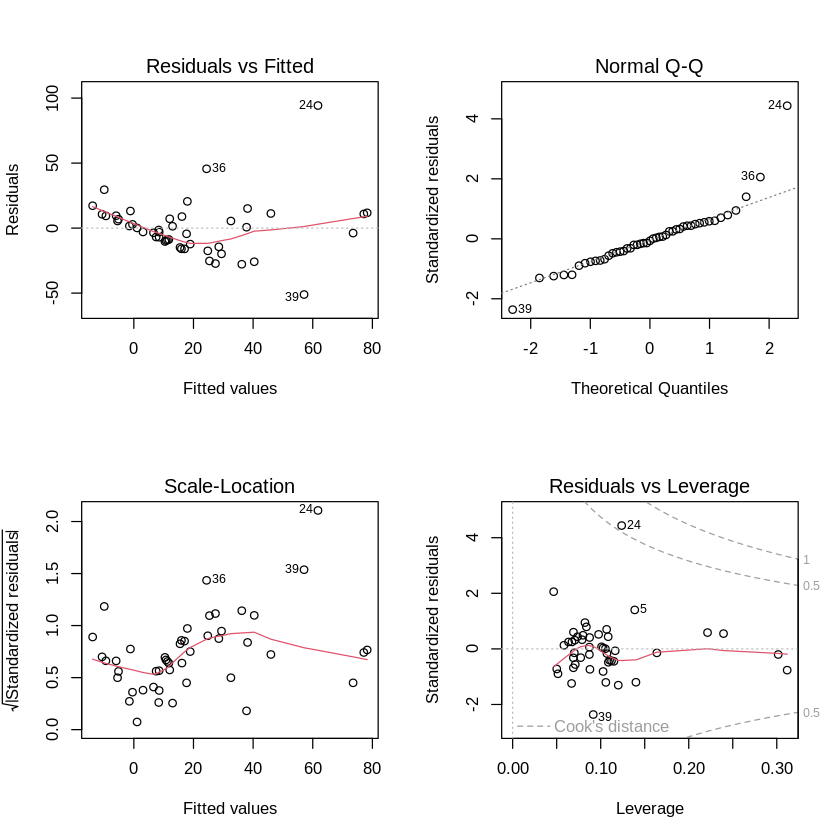

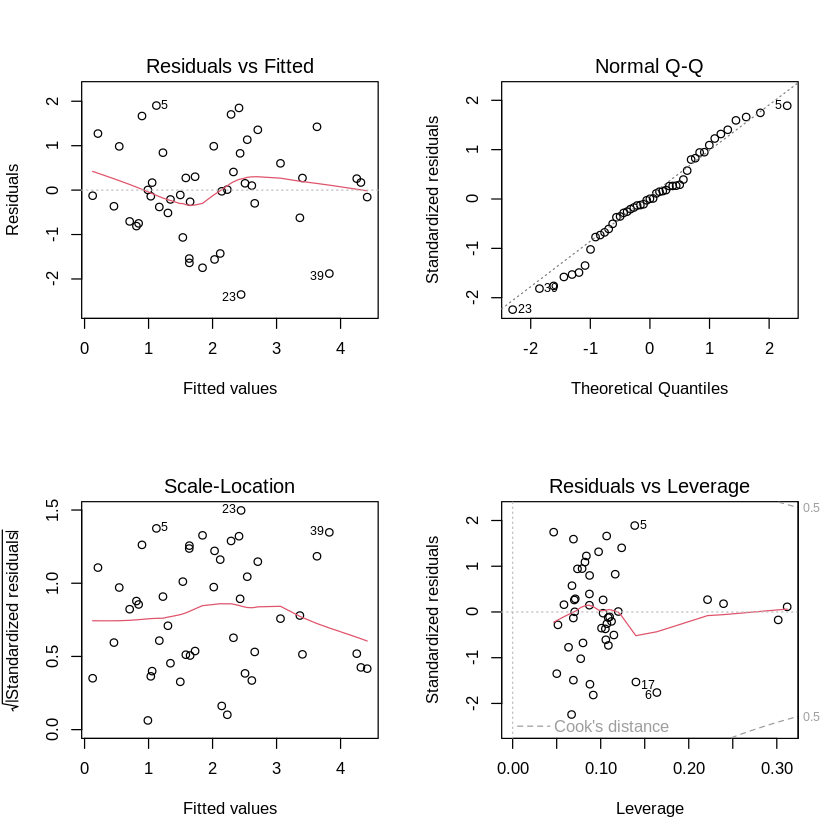

In [ ]:
par(mfrow=c (2, 2))
plot(mdl1)
plot(mdl2)

**Ans 1.1**

The plot of Y_org does not have the residuals centered at 0. Also, the Y_log plot does neither centre at 0, but performs better than Y_org.

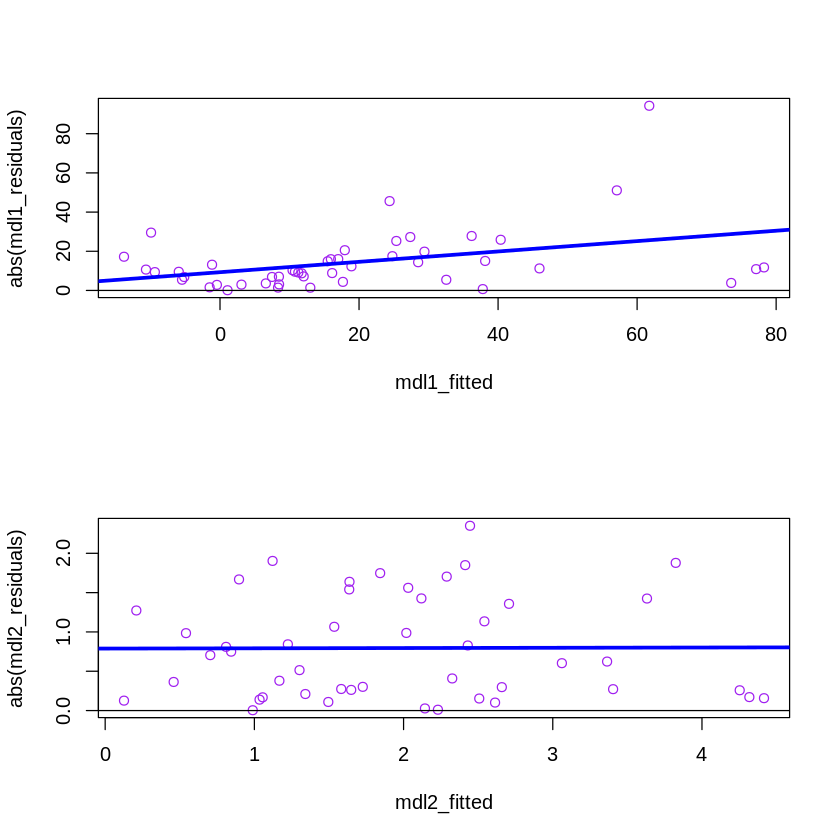

In [ ]:
par(mfrow=c (2, 1))
plot(mdl1_fitted, abs(mdl1_residuals), col = "purple" )
abline(0,0)
abline(lm(abs(mdl1_residuals)~mdl1_fitted),col = "blue", lwd = 3)

plot(mdl2_fitted, abs(mdl2_residuals), col = "purple" )
abline(0,0)
abline(lm(abs(mdl2_residuals)~mdl2_fitted),col = "blue", lwd = 3)

In [ ]:
summary(lm(abs(mdl1_residuals)~mdl1_fitted))


Call:
lm(formula = abs(mdl1_residuals) ~ mdl1_fitted)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.944  -7.411  -2.467   3.409  68.590 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   9.3303     2.8789   3.241  0.00224 **
mdl1_fitted   0.2645     0.0968   2.732  0.00895 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.02 on 45 degrees of freedom
Multiple R-squared:  0.1423,	Adjusted R-squared:  0.1232 
F-statistic: 7.466 on 1 and 45 DF,  p-value: 0.008952


In [ ]:
summary(lm(abs(mdl2_residuals)~mdl2_fitted))


Call:
lm(formula = abs(mdl2_residuals) ~ mdl2_fitted)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7875 -0.5635 -0.1763  0.5921  1.5537 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.788325   0.202794   3.887 0.000331 ***
mdl2_fitted 0.003324   0.090409   0.037 0.970830    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6626 on 45 degrees of freedom
Multiple R-squared:  3.005e-05,	Adjusted R-squared:  -0.02219 
F-statistic: 0.001352 on 1 and 45 DF,  p-value: 0.9708


**Ans 1.2**

We test the constant variance assumption. Since the variation in Y_org increases with increase in fitted values, Y_org does not obey constant varation. Y_log on the other hand shows a constant variance overall.

This can been seen from β1 values. β1_org is significant while β1_log is not a significant coefficient.

_____________________________________
**Problem 2**

In [ ]:
shapiro.test(mdl2_residuals)


	Shapiro-Wilk normality test

data:  mdl2_residuals
W = 0.97609, p-value = 0.4418


**Ans 2.1**

The qq plot shows heavy tails on the left. The Shapiro-Wilk test confirms that the residuals follow normal distribution, since p value = 0.44

We can check the number of observations that result in residuals being statistically significant at α = 0.5 using Bonferroni's correction

In [ ]:
ext_stud_res = rstudent(mdl2)
dof = mdl2$df.residual - 1
alpha = 0.5/47
sum(2*pt(abs(ext_stud_res),dof,lower.tail = F) < alpha)

[1] 0

**Ans 2.2**

No observation resulted in a p-value smaller than α, so not observation is considered as an outlier.

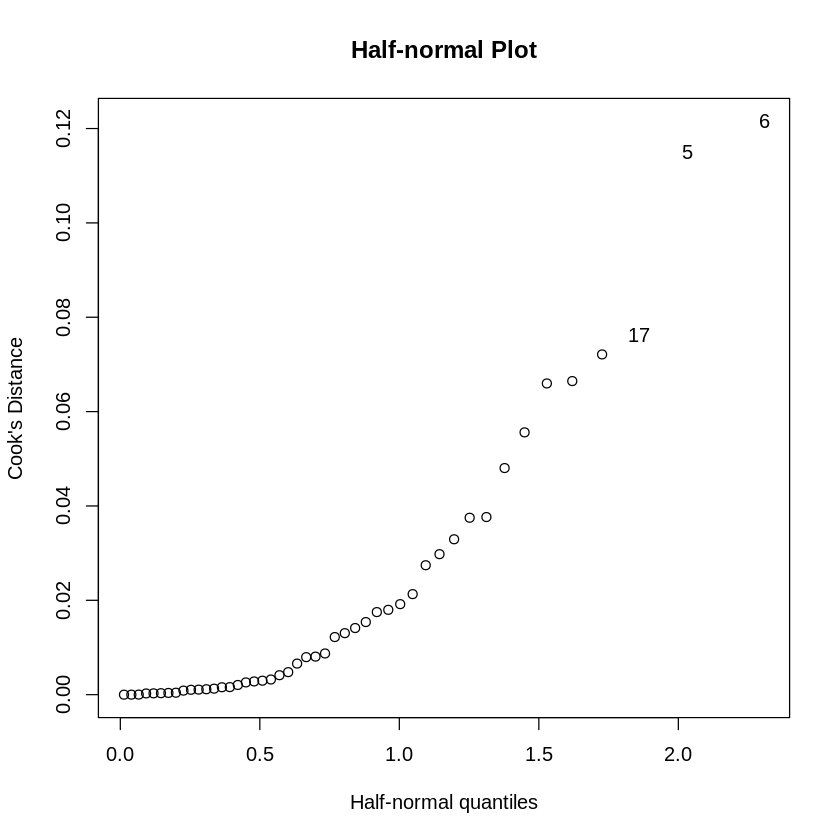

In [ ]:
cook = cooks.distance(mdl2)
halfnorm(cook, nlab = 3, ylab = "Cook's Distance", main = "Half-normal Plot" )
mdl2_wo_inf = lm (log(gamble+1) ~ sex + status + income + verbal, data= teengamb, subset = cook < sort(cook)[length(cook)-1])

In [ ]:
summary(mdl2)


Call:
lm(formula = log(gamble + 1) ~ sex + status + income + verbal, 
    data = teengamb)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.35012 -0.56865  0.00413  0.71512  1.90319 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.71620    0.82240   2.087   0.0430 *  
sex         -0.87120    0.39268  -2.219   0.0320 *  
status       0.02983    0.01344   2.219   0.0320 *  
income       0.21565    0.04904   4.398 7.33e-05 ***
verbal      -0.26165    0.10388  -2.519   0.0157 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.085 on 42 degrees of freedom
Multiple R-squared:  0.5206,	Adjusted R-squared:  0.475 
F-statistic:  11.4 on 4 and 42 DF,  p-value: 2.347e-06


In [ ]:
summary(mdl2_wo_inf)


Call:
lm(formula = log(gamble + 1) ~ sex + status + income + verbal, 
    data = teengamb, subset = cook < sort(cook)[length(cook) - 
        1])

Residuals:
     Min       1Q   Median       3Q      Max 
-2.38434 -0.43732 -0.02604  0.56840  1.87416 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.82587    0.81007   2.254  0.02975 *  
sex         -0.86785    0.41992  -2.067  0.04528 *  
status       0.03097    0.01427   2.170  0.03604 *  
income       0.21987    0.04688   4.690 3.16e-05 ***
verbal      -0.28947    0.10171  -2.846  0.00695 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.033 on 40 degrees of freedom
Multiple R-squared:  0.5669,	Adjusted R-squared:  0.5236 
F-statistic: 13.09 on 4 and 40 DF,  p-value: 6.662e-07


In [ ]:
influence = lm.influence(mdl2)
head(influence$coefficients, 10)

,(Intercept),sex,status,income,verbal
1,6.010227e-02,-0.0539095631,-7.848712e-04,1.226157e-03,-3.722154e-03
2,-2.676408e-03,-0.0022517808,3.413461e-04,6.934369e-04,-2.715587e-03
3,-3.946406e-02,-0.0428480094,-1.091537e-04,3.476859e-03,4.081103e-03
4,-1.514385e-03,-0.0019501571,-2.801948e-05,-1.414729e-04,5.387988e-04
5,-3.173773e-01,0.2321092061,7.013178e-03,2.268919e-03,-8.590313e-03
6,1.970410e-01,-0.2423320854,-8.539813e-03,-7.291260e-03,4.153252e-02
7,1.373593e-03,-0.0055338543,1.821983e-04,-1.986499e-04,-1.445359e-03
8,1.192742e-02,0.0171493035,1.494686e-05,1.050096e-03,-2.628483e-03
9,7.864888e-05,0.0002859671,4.651445e-06,-1.285038e-05,-3.761376e-05
10,-2.327921e-02,-0.0124400134,2.238774e-03,-4.010397e-04,-1.336105e-02


**Ans 2.3**

From the plot, it is seen that observations 5 and 6 are influential for the model. The effect of these observations can be seen when comparing the model containing these observations with the model that does not.

The model without influencers has an improved R^2 value.
We can see the difference in estimates of predictors when individual points 5 & 6 are removed from the table.